In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
taxi_fare={
    'Distance':range(1,6,1),
    'Fare': list(np.arange(7.5,18,2.5)),
    'Fare including tips':[8,10,14,15,20]
}

In [21]:
taxi_rent=pd.DataFrame(taxi_fare)

<ipython-input-36-d144bd7bb2a4>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


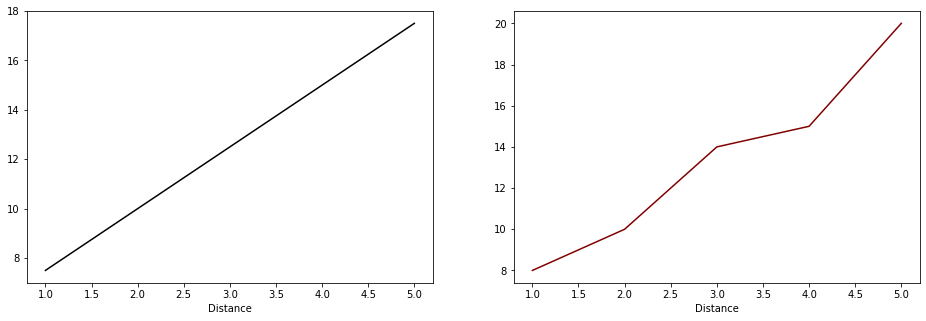

In [36]:
fig,axs=plt.subplots(1,2,figsize=(16,5))
# taxi_rent.plot(
# # title='Sides vs Length of Name',
# kind='scatter',
# x='Distance',
# y='Fare',
# ax=axs[0]
# # y='Fare including tips',
# color='blue'
# )
taxi_rent.set_index('Distance')['Fare'].plot(kind='line', ax=axs[0], color='black')
# taxi_rent.plot(
# title='Sides vs Length of Name',
# kind='scatter',
# x='Distance',
# ax=axs[1],
# # y='Fare',
# y='Fare including tips',
# color='red'
# )
taxi_rent.set_index('Distance')['Fare including tips'].plot(kind='line',ax=axs[1], color='maroon',label='estimated')
fig.show()

In [23]:
# estimating amount to pay the driver
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(taxi_rent[['Distance']],taxi_rent[['Fare including tips']])
taxi_rent['Predicted Fare including tips']=reg.predict(taxi_rent[['Distance']])
print(taxi_rent)

   Distance  Fare  Fare including tips  Predicted Fare including tips
0         1   7.5                    8                            7.6
1         2  10.0                   10                           10.5
2         3  12.5                   14                           13.4
3         4  15.0                   15                           16.3
4         5  17.5                   20                           19.2


<ipython-input-24-94f5a2550b8a>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


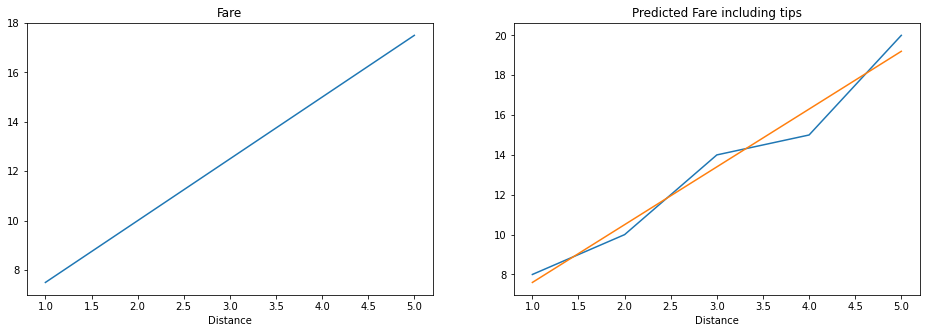

In [24]:
fig,axs=plt.subplots(1,2,figsize=(16,5))
taxi_rent.set_index('Distance')['Fare'].plot(title='Fare',kind='line',ax=axs[0])
taxi_rent.set_index('Distance')['Fare including tips'].plot(title='Fare including tips',kind='line',ax=axs[1],label='actual')
taxi_rent.set_index('Distance')['Predicted Fare including tips'].plot(title='Predicted Fare including tips',kind='line',ax=axs[1],label='estimated')
fig.show()

Predicting the house price in Boston

In [25]:
from sklearn.datasets import load_boston
boston=load_boston()
df_dataset=pd.DataFrame(
    boston.data,
    columns=boston.feature_names
)
df_dataset['target']=boston.target

In [26]:
df_dataset.head(n=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


Check for null valus

In [27]:
df_dataset.isnull().sum().sum()

0

plotting the data

<ipython-input-28-1940a3490def>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


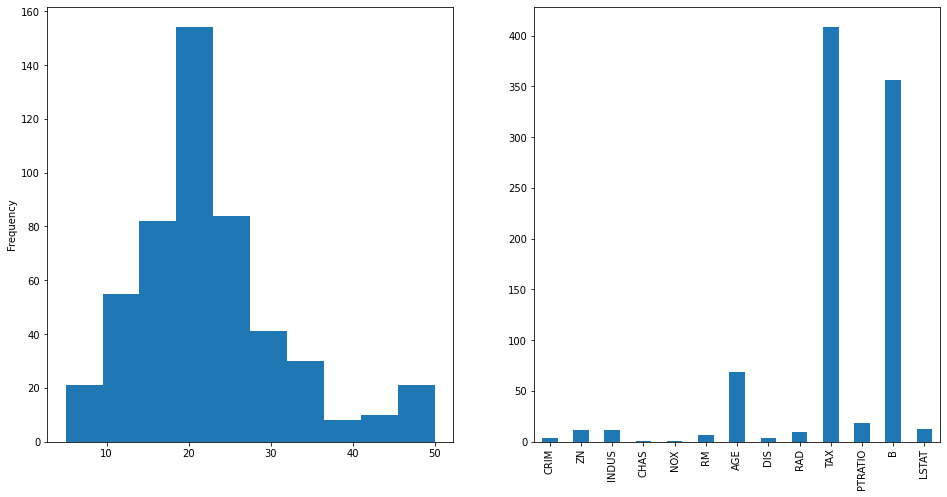

In [28]:
fig,axs=plt.subplots(1,2,figsize=(16,8))
df_dataset['target'].plot(
    kind='hist',
    ax=axs[0]
)
df_dataset[boston.feature_names].mean().plot(
    kind='bar',
    ax=axs[1]
)
fig.show()

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

watching the percentage of prices

In [30]:
df_dataset['target'].describe(percentiles=(0.9,0.95,0.99))

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

splitting the data

In [31]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df_dataset,test_size=0.4)
X_train=df_train[boston.feature_names]
Y_train=df_train['target']
X_test=df_test[boston.feature_names]
Y_test=df_test['target']

creating a baseline to compare with

In [32]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score
baselin=DummyRegressor(strategy='mean')
baselin.fit(X_train,Y_train)
y_test_baselin = baselin.predict(X_test)
print(baselin.score(X_train,Y_train))
print(baselin.score(X_test,Y_test))

0.0
-0.02152496684756633


Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_test=reg.predict(X_test)
reg.score(X_test,Y_test)

0.7261730906431296

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R2 regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    r2_score(Y_test,y_test),
    r2_score(Y_test,y_test_baselin)
))
print('MSE regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    mean_squared_error(Y_test,y_test),
    mean_squared_error(Y_test,y_test_baselin)
))
print('MAE regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    mean_absolute_error(Y_test,y_test),
    mean_absolute_error(Y_test,y_test_baselin)
))

R2 regressor=0.73 vs Baselin regressor=-0.02
MSE regressor=25.27 vs Baselin regressor=94.29
MAE regressor=3.54 vs Baselin regressor=6.81


feature importance

In [35]:
df_feature_imaportance=pd.DataFrame({
    'Features': X_train.columns,
    'Coef': reg.coef_,
    'Abs(ref)':abs(reg.coef_)
}).set_index('Features').sort_values('Coef')
df_feature_imaportance.head(n=12)
# print(df_train.shape)

,Coef,Abs(ref)
Features,,
NOX,-13.543340,13.543340
DIS,-1.255561,1.255561
PTRATIO,-0.934234,0.934234
LSTAT,-0.531260,0.531260
CRIM,-0.132852,0.132852
TAX,-0.014867,0.014867
AGE,-0.009333,0.009333
INDUS,0.003420,0.003420
B,0.009503,0.009503


Scaling for more meaningful coefficient

In [36]:
# squeezing out the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
scaler=MinMaxScaler()
reg=LinearRegression()
scaler.fit(X_train)
x_trained_scaled=scaler.transform(X_train)
# x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(X_test)
reg.fit(x_trained_scaled,Y_train)
y_test_pred=reg.predict(x_test_scaled)

NOX became less important. which makes more sense of the data

In [37]:
adf_feature_imaportance=pd.DataFrame({
    'Features': X_train.columns,
    'Coef': reg.coef_,
    'Abs(ref)':abs(reg.coef_)
}).set_index('Features').sort_values('Coef')
df_feature_imaportance.head(n=12)

,Coef,Abs(ref)
Features,,
LSTAT,-17.420013,17.420013
DIS,-13.757686,13.757686
CRIM,-11.818943,11.818943
PTRATIO,-8.781802,8.781802
TAX,-7.790438,7.790438
NOX,-6.582063,6.582063
AGE,-0.877312,0.877312
INDUS,0.090736,0.090736
CHAS,2.486020,2.486020


adding polynomial feature

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
# preserving the feature names
feature_translator = [
(f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)
]
def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s
poly_features = [
translate_feature_names(f) for f in poly.get_feature_names()
]
x_train_poly = pd.DataFrame(X_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(X_test_poly, columns=poly_features)

fitting derived polynomial features to linear regressor

In [47]:
x_train_poly.head(n=2)
# column "1" where all the values are 1. this is equivalent to intercept

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZN0^3,ZN0^2 ZN1,ZN0^2 ZN2,ZN0 ZN1^2,ZN0 ZN1 ZN2,ZN0 ZN2^2,ZN1^3,ZN1^2 ZN2,ZN1 ZN2^2,ZN2^3
0,1.0,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,...,8242.408,160943.2172,6981.5644,3.142616e+06,136323.68546,5913.59242,6.136346e+07,2.661889e+06,115470.210803,5008.988431
1,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,...,6967.871,140459.1462,5402.8361,2.831392e+06,108910.99242,4189.31951,5.707552e+07,2.195440e+06,84448.785222,3248.367641


In [56]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=False)
reg.fit(x_train_poly,Y_train)
y_pred=reg.predict(x_test_poly)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('R2 regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    r2_score(y_pred,Y_test),
    r2_score(Y_test,y_test_baselin)
))
print('MSE regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    mean_squared_error(y_pred,Y_test),
    mean_squared_error(Y_test,y_test_baselin)
))
print('MAE regressor={:.2f} vs Baselin regressor={:.2f}'.format(
    mean_absolute_error(y_pred,Y_test),
    mean_absolute_error(Y_test,y_test_baselin)
))

R2 regressor=0.01 vs Baselin regressor=-0.02
MSE regressor=11563.39 vs Baselin regressor=94.29
MAE regressor=51.99 vs Baselin regressor=6.81


Regularizing the regressor

training the lasso regressor

In [63]:
from sklearn.linear_model import Lasso,Ridge
reg=Lasso(fit_intercept=False)
reg.fit(X_train_poly, Y_train)
y_test_pred=reg.predict(X_test_poly)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('R2 regressor for polynomial={:.2f} vs lasso regressor={:.2f}'.format(
    r2_score(y_pred,Y_test),
    r2_score(Y_test,y_test_pred)
))
print('MSE regressor for polynomial={:.2f} vs lasso regressor={:.2f}'.format(
    mean_squared_error(y_pred,Y_test),
    mean_squared_error(Y_test,y_test_pred)
))
print('MAE regressor for polynomial={:.2f} vs lasso regressor={:.2f}'.format(
    mean_absolute_error(y_pred,Y_test),
    mean_absolute_error(Y_test,y_test_pred)
))
# result is better than linear regression

R2 regressor for polynomial=0.01 vs lasso regressor=0.79
MSE regressor for polynomial=11563.39 vs lasso regressor=19.51
MAE regressor for polynomial=51.99 vs lasso regressor=2.60


/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695.1861053961015, tolerance: 16.995467000000005
  model = cd_fast.enet_coordinate_descent(


training with lasso regressor(optimizing regularization parameter)

In [73]:
from sklearn.linear_model import LassoCV
alphas=np.logspace(-6,6,50)
reg=LassoCV(alphas=alphas,fit_intercept=False,cv=5)
reg.fit(X_train_poly,Y_train)
y_test_pred=reg.predict(X_test_poly)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(
    r2_score(Y_test,y_test_pred)
)
print(
    mean_squared_error(Y_test,y_test_pred)
)
print(
    mean_absolute_error(Y_test,y_test_pred)
)

/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.3181459602747, tolerance: 13.704025000000001
  model = cd_fast.enet_coordinate_descent(
/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1570.689267459321, tolerance: 13.704025000000001
  model = cd_fast.enet_coordinate_descent(
/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.72823258735934, tolerance: 13.704025000000001
  model = cd_fast.enet_coordinate_descent(
/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Convergen

0.7962138437934827
18.809403172344666
3.0050558770728806


/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.78104859352908, tolerance: 12.980476999999999
  model = cd_fast.enet_coordinate_descent(
/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1933.1236357896541, tolerance: 16.995467000000005
  model = cd_fast.enet_coordinate_descent(


In [74]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 2023.5896477251556


In [71]:
# for each alpha(row), the mse values of each validation
print(reg.mse_path_)

AttributeError: 'Lasso' object has no attribute 'mse_path_'

Plot confidence interval vs alpha

In [ ]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]
# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
{
    'alpha': reg.alphas_,
    'Mean MSE': mse_mean,
    'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
    'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
}
).set_index('alpha')[
['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
title='Regularization plot (MSE vs alpha)',
marker='.', logx=True, ax=ax
)
# Color the confidence interval
plt.fill_between(
reg.alphas_,
mse_mean + 1.96 * mse_std_error,
mse_mean - 1.96 * mse_std_error,
)
# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

Lasso with final optimized alpha value

In [77]:
from sklearn.linear_model import Lasso,Ridge
reg=Lasso(fit_intercept=False,alpha=2023.5896477251556)
reg.fit(X_train_poly, Y_train)
y_test_pred=reg.predict(X_test_poly)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('R2 regressor for polynomial={:.2f} vs lasso regressor with optimized alpha={:.2f}'.format(
    r2_score(y_pred,Y_test),
    r2_score(Y_test,y_test_pred)
))
print('MSE regressor for polynomial={:.2f} vs lasso regressor with optimized alpha={:.2f}'.format(
    mean_squared_error(y_pred,Y_test),
    mean_squared_error(Y_test,y_test_pred)
))
print('MAE regressor for polynomial={:.2f} vs lasso regressor with optimized alpha={:.2f}'.format(
    mean_absolute_error(y_pred,Y_test),
    mean_absolute_error(Y_test,y_test_pred)
))

R2 regressor for polynomial=0.01 vs lasso regressor with optimized alpha=0.80
MSE regressor for polynomial=11563.39 vs lasso regressor with optimized alpha=18.81
MAE regressor for polynomial=51.99 vs lasso regressor with optimized alpha=3.01


/home/mahmud/AI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1933.1236357896541, tolerance: 16.995467000000005
  model = cd_fast.enet_coordinate_descent(


<i>Finding regressor interval</i>

<AxesSubplot:xlabel='x', ylabel='y'>

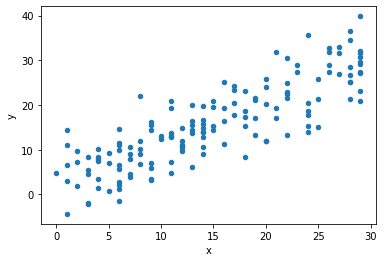

In [3]:
# let's create a noisy dataset. y=x+noise
import numpy as np
import pandas as pd
df_noisy = pd.DataFrame(
    {
        'x': np.random.randint(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)
df_noisy['y'] = df_noisy['x'] + df_noisy['noise']
df_noisy.plot(
kind='scatter', x='x', y='y'
)

<i>fit and predict using bayesian and linear regression</i>

In [12]:
df_noisy.head(n=2)
print(df_noisy['x'].shape)

print(df_noisy['y'].shape)

(150,)
(150,)


In [14]:
from sklearn.linear_model import LinearRegression, BayesianRidge
lr=LinearRegression()
br=BayesianRidge()
lr.fit(df_noisy[['x']],df_noisy['y'])
df_noisy['y_lr_pred']=lr.predict(df_noisy[['x']])
br.fit(df_noisy[['x']],df_noisy['y'])
df_noisy['y_br_pred'],df_noisy['y_br_std']=br.predict(df_noisy[['x']],return_std=True)

In [16]:
df_noisy.head(n=2)

,x,noise,y,y_lr_pred,y_br_pred,y_br_std
0,11,1.897323,12.897323,12.299516,12.308934,4.999793
1,15,4.523179,19.523179,15.972607,15.972197,5.023141


<ipython-input-20-21a2974c771f>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


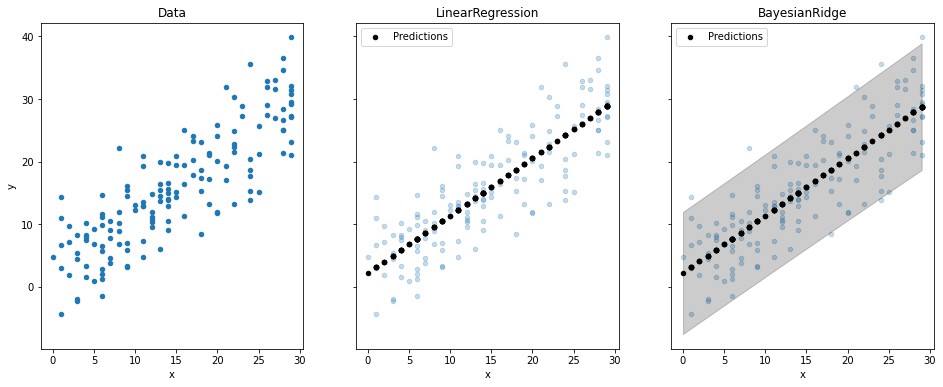

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)
# We plot the data 3 times
df_noisy.sort_values('x').plot(
title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)
# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(
title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
ax=axs[1], marker='o', color='k', label='Predictions'
)
# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(
title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
ax=axs[2], marker='o', color='k', label='Predictions'
)
# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(
df_noisy.sort_values('x')['x'],
df_noisy.sort_values('x')['y_br_pred'] - 1.96 *
df_noisy.sort_values('x')['y_br_std'],
df_noisy.sort_values('x')['y_br_pred'] + 1.96 *
df_noisy.sort_values('x')['y_br_std'],
color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)
fig.show()

<i>show me your true face logistic function</i>

<ipython-input-25-40bafc35925d>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


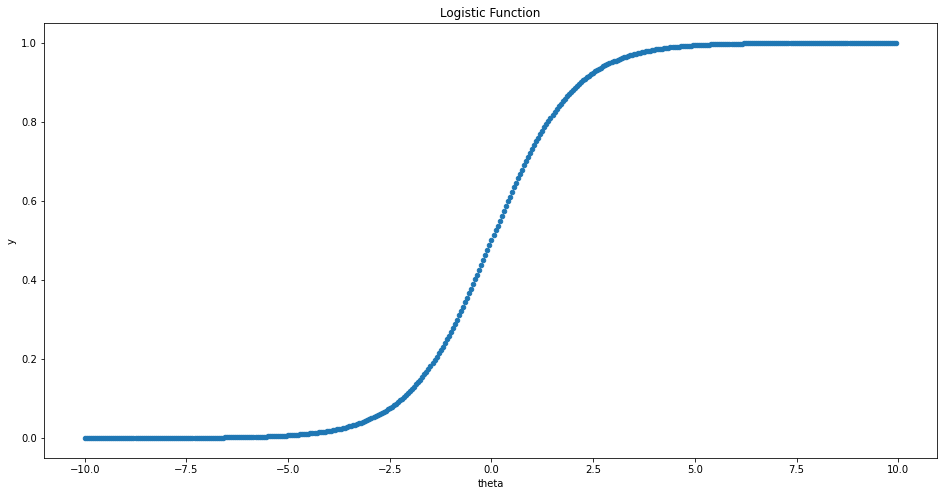

In [25]:
import numpy as np
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
theta = np.arange(-10, 10, 0.05)
y = 1 / (1 + np.exp(-1 * theta))
pd.DataFrame(
{
'theta': theta,
'y': y
}
).plot(
title='Logistic Function',
kind='scatter', x='theta', y='y',
ax=ax
)
fig.show()

Classifying iris dataset using logistic regression

In [2]:
from sklearn import datasets
import pandas as pd
iris=datasets.load_iris()
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)
df['target'] = pd.Series(
    iris.target
)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import numpy as np
num_folds=6
clf=LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=1000)
accuracy_scores=cross_validate(clf,df[iris.feature_names],df['target'],cv=num_folds,scoring=['accuracy'])
accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)
print(
'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
num_folds,
(accuracy_mean - 1.96 * accuracy_sterror),
(accuracy_mean + 1.96 * accuracy_sterror),
)
)

Logistic Regression: Accuracy (6-fold): 0.94 ~ 0.99


In [12]:
# if we don't scale our features it will create serious problems
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[iris.feature_names])
x_trained_scaled=scaler.transform(df[iris.feature_names])
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled=scaler.transform(X_test)
# reg.fit(x_trained_scaled,Y_train)
# y_test_pred=reg.predict(x_test_scaled)

In [13]:
# We need to fit the model again before getting its coefficients
clf.fit(x_trained_scaled, df['target'])
# We use dictionary comprehension instead of a for-loop
df_coef = pd.DataFrame(
{
f'Coef [Class {class_id}]': clf.coef_[class_id]
for class_id in range(clf.coef_.shape[0])
},
index=iris.feature_names
)
df_coef.loc['intercept', :] = clf.intercept_

In [14]:
df_coef.head()

,Coef [Class 0],Coef [Class 1],Coef [Class 2]
sepal length (cm),-1.404926,0.261358,1.143569
sepal width (cm),1.560021,-1.437230,-0.122791
petal length (cm),-2.860633,0.418396,2.442238
petal width (cm),-2.787136,-0.478438,3.265574
intercept,2.203698,1.229151,-3.432848


In [16]:
def plot_decision_boundary(clf, x, y, ax, title):
    cmap='Paired_r'
    feature_names = x.columns
    x, y = x.values, y.values
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    step = 0.02
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3,random_state=22)

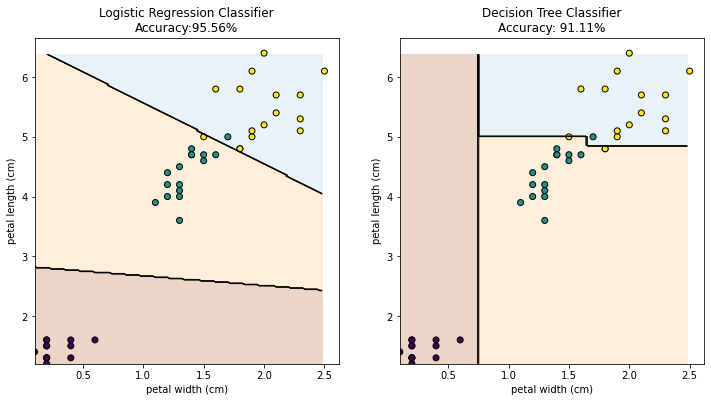

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
two_features = ['petal width (cm)', 'petal length (cm)']
clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(df_test['target'],clf_lr.predict(df_test[two_features]))
plot_decision_boundary(clf_lr, df_test[two_features], df_test['target'], ax=axs[0],title=f'Logistic Regression Classifier\nAccuracy:{accuracy:.2%}')
clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(df_test['target'],clf_dt.predict(df_test[two_features]))
plot_decision_boundary(clf_dt, df_test[two_features], df_test['target'], ax=axs[1],title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}')
# fig.show()